## MACS 30000 Assignment 8
### Unsupervised Learning

#### Name: Mengchen Shi
#### Date: December 2nd, 2017

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

### Colleges

In [2]:
df = pd.read_csv("./data/College.csv")

In [3]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660.0,1232.0,721.0,23.0,52.0,2885.0,537.0,7440.0,3300.0,450.0,2200.0,70.0,78.0,18.1,12.0,7041.0,60.0
1,Yes,2186.0,1924.0,512.0,16.0,29.0,2683.0,1227.0,12280.0,6450.0,750.0,1500.0,29.0,30.0,12.2,16.0,10527.0,56.0
2,Yes,1428.0,1097.0,336.0,22.0,50.0,1036.0,99.0,11250.0,3750.0,400.0,1165.0,53.0,66.0,12.9,30.0,8735.0,54.0
3,Yes,417.0,349.0,137.0,60.0,89.0,510.0,63.0,12960.0,5450.0,450.0,875.0,92.0,97.0,7.7,37.0,19016.0,59.0
4,Yes,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,4120.0,800.0,1500.0,76.0,72.0,11.9,2.0,10922.0,15.0


In [4]:
#Tranform Private to numeric data
df.Private = pd.get_dummies(df.Private)

#### Question 1

In [5]:
pca = PCA(2).fit(StandardScaler().fit_transform(df.values))

In [6]:
df_pc = pd.DataFrame(pca.components_.T, index=df.columns, columns = ['PC1', 'PC2'])

In [7]:
df_pc

,PC1,PC2
Private,-0.089010,0.345879
Apps,0.199630,0.343621
Accept,0.153797,0.372557
Enroll,0.117797,0.399697
Top10perc,0.360349,-0.016238
Top25perc,0.344751,0.017730
F.Undergrad,0.094088,0.410732
P.Undergrad,-0.017483,0.293064
Outstate,0.327664,-0.191518
Room.Board,0.266534,-0.093979


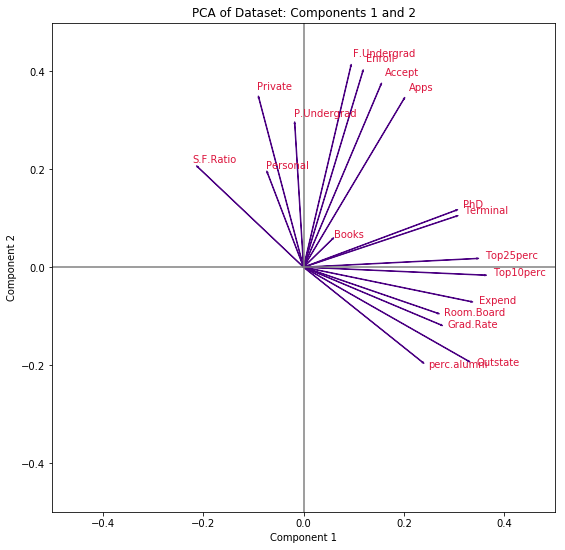

In [8]:
def pca_plot(data, pc, pca1, pca2, lim):
    
    fig , ax = plt.subplots(figsize=(9,9))
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)
    ax.hlines(0,-lim, lim, colors='grey')
    ax.vlines(0,-lim, lim, colors='grey')
    
    for i in range(len(data.columns)):
        ax.arrow(0, 0, pca1[i], pca2[i], color = "indigo")
    for i in pc[:].index:
        ax.annotate(i, (pca1.loc[i] * 1.05, pca2.loc[i] * 1.05), color='crimson')

    plt.title('PCA of Dataset: Components 1 and 2')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.show()
    
pca_plot(df, df_pc, df_pc.PC1, df_pc.PC2, 0.5)

##### What variables appear strongly correlated on the first principal component?
According to the plot above, "PhD", "Terminal", "Top25perc", "Top10perc", "Expend", "Outstate" are strongly correlated on the first principal component.

##### What about the second principal component?
"Private", "P.undergrad", "Apps", "Accept", "Enroll" and "F.undergrad" are strongly correlated on the second principal component.


#### Question 2

In [9]:
from matplotlib.pyplot import figure, show
from matplotlib.ticker import MaxNLocator

In [10]:
all_pca = PCA().fit(StandardScaler().fit_transform(df.values))

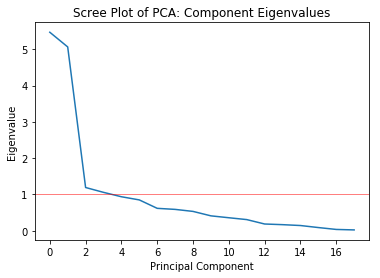

In [11]:
def scree_plot():
    ax = figure().gca()
    ax.plot(all_pca.explained_variance_)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlabel('Principal Component')
    plt.ylabel('Eigenvalue')
    plt.axhline(y=1, linewidth=1, color='r', alpha=0.5)
    plt.title('Scree Plot of PCA: Component Eigenvalues')
    show()
    
scree_plot()

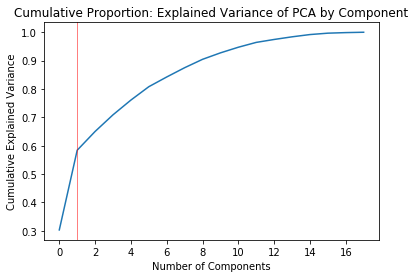

0.58422332958807277

In [12]:
def var_explained():
    
    ax = figure().gca()
    ax.plot(np.cumsum(all_pca.explained_variance_ratio_))
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.axvline(x=1, linewidth=1, color='r', alpha=0.5)
    plt.title('Cumulative Proportion: Explained Variance of PCA by Component')
    show()
    
var_explained()
all_pca.explained_variance_ratio_[:2].sum()

##### The cumulative proportion of variance explained is shown above

About 58.42% of the variance in College is explained by the first two principal components.

### States

#### Question 1

In [13]:
usdf = pd.read_csv("./data/USArrests.csv", index_col = 0)

In [14]:
usdf.head()

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [15]:
pca2 = PCA(2).fit(StandardScaler().fit_transform(usdf.values))
usdf_pc = pd.DataFrame(pca2.components_.T, index=usdf.columns, columns = ['PC1', 'PC2'])
usdf_pc

,PC1,PC2
Murder,0.535899,0.418181
Assault,0.583184,0.187986
UrbanPop,0.278191,-0.872806
Rape,0.543432,-0.167319


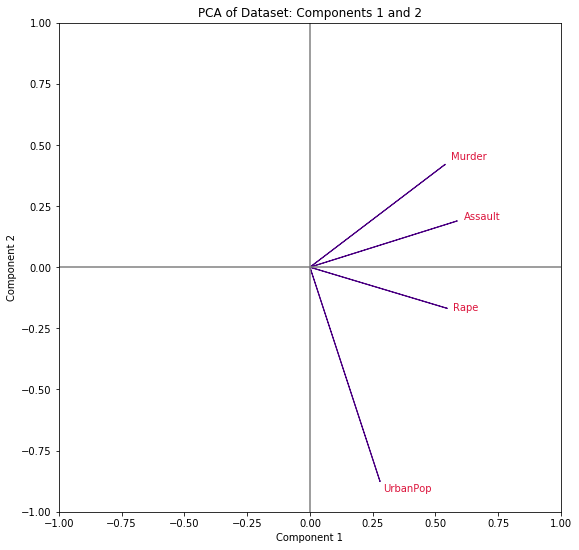

In [16]:
pca_plot(usdf, usdf_pc, usdf_pc.PC1, usdf_pc.PC2, 1)

In [17]:
usdf_scaled = StandardScaler().fit_transform(usdf.values)
pca3 = PCA(2).fit(usdf_scaled).transform(usdf_scaled)
usdf_pc2 = pd.DataFrame(pca3, index=usdf.index, columns = ['PC1', 'PC2'])

In [18]:
usdf_pc2

,PC1,PC2
State,,
Alabama,0.985566,1.133392
Alaska,1.950138,1.073213
Arizona,1.763164,-0.745957
Arkansas,-0.141420,1.119797
California,2.523980,-1.542934
Colorado,1.514563,-0.987555
Connecticut,-1.358647,-1.088928
Delaware,0.047709,-0.325359
Florida,3.013042,0.039229


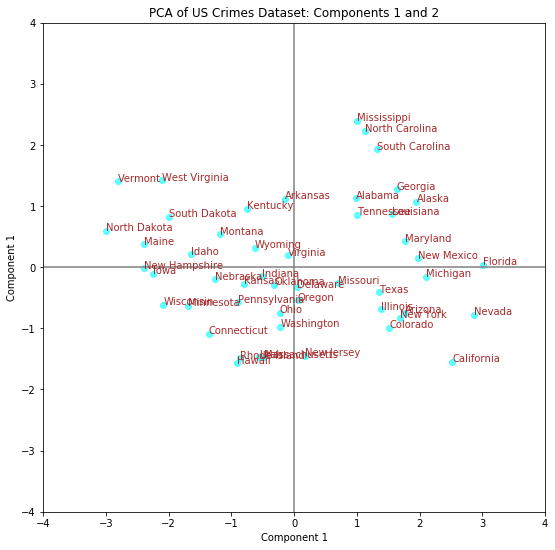

In [19]:
#generate scatterplot
def pca_scatter():
    plt.close
    plt.figure(figsize = (9, 9))
    plt.xlim(-4,4)
    plt.ylim(-4,4)
    plt.hlines(0, -4, 4, linestyles='-', colors='grey')
    plt.vlines(0, -4, 4, linestyles='-', colors='grey')
    lw = 1

    plt.scatter(usdf_pc2['PC1'], usdf_pc2['PC2'], color = "cyan", alpha=.6, lw=lw)
    
    for i in usdf_pc2[:].index:
        plt.annotate(i, (usdf_pc2.PC1.loc[i], usdf_pc2.PC2.loc[i]), color= 'brown')
    
    plt.title('PCA of US Crimes Dataset: Components 1 and 2')
    plt.xlabel('Component 1')
    plt.ylabel('Component 1')
    plt.show()

pca_scatter()

#### Question 2 - 5

In [20]:
from sklearn.cluster import KMeans

In [21]:
def find_clusters(df, pc, K):
    #K-means clustering
    km_k = KMeans(K, n_init=20).fit(df)
    #scatterplot
    plt.figure(figsize=(9,9)) 
    plt.scatter(pc.PC1, pc.PC2, c=km_k.labels_, s=50)
    for i in usdf_pc2[:].index:
        plt.annotate(i, (usdf_pc2.PC1.loc[i], usdf_pc2.PC2.loc[i]), color= 'brown')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title('K-means clustering with K = {}'.format(K))
    plt.show()
    

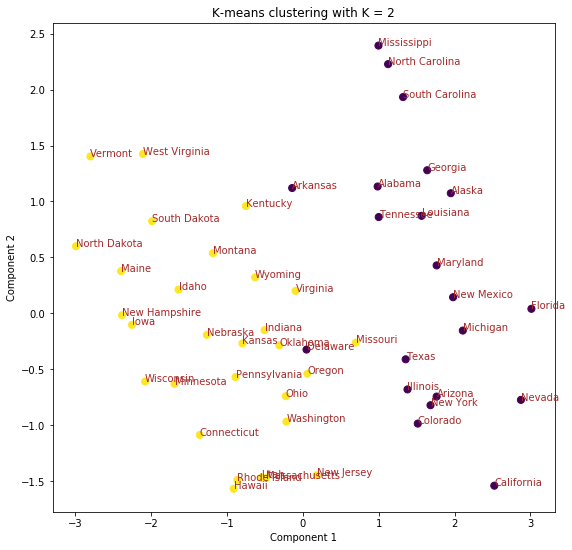

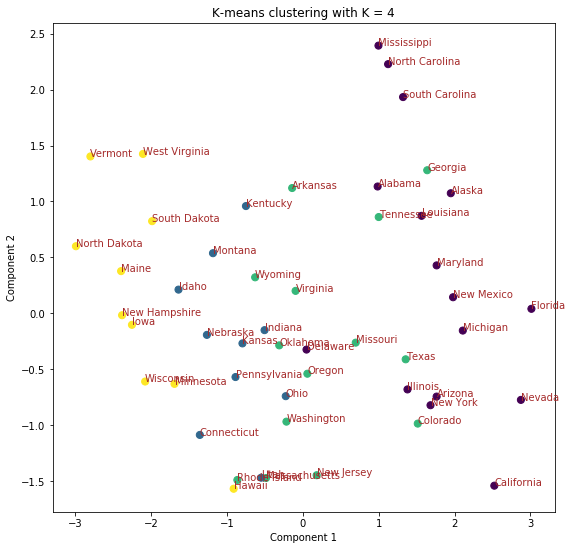

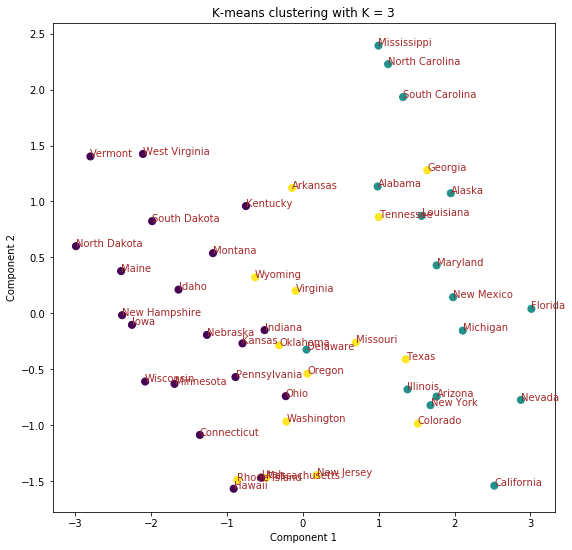

In [22]:
# K-means clustering on the first two principal components raw data
find_clusters(usdf, usdf_pc2, 2)
find_clusters(usdf, usdf_pc2, 4)
find_clusters(usdf, usdf_pc2, 3)

We see that the k-means has seperated our data into 2, 4 and 3 groups in the plots above. 

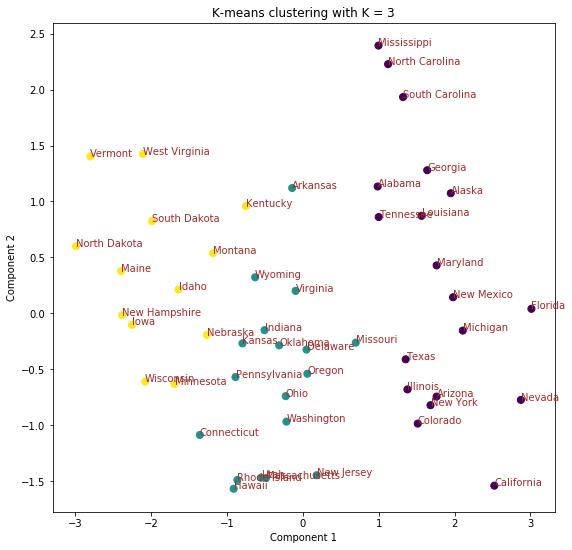

In [23]:
# K-means clustering with K=3 on the first two principal components score vectors
find_clusters(usdf_pc2, usdf_pc2, 3)

It seems that using score vectors generates more accurate clusting groups with clearer boundaries than using raw data.

#### Question 6

In [24]:
import scipy.cluster.hierarchy as hr

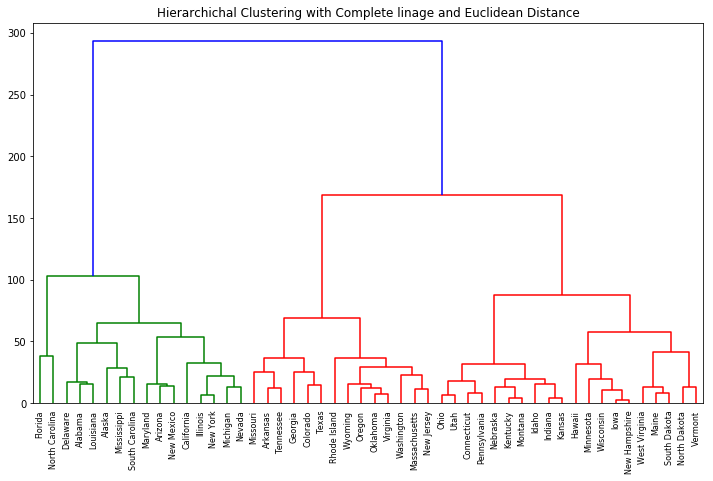

In [25]:
h_custer = hr.complete(usdf)
plt.figure(figsize=(12,7))
hr.dendrogram(h_custer, labels = usdf.index)
plt.title("Hierarchichal Clustering with Complete linage and Euclidean Distance")
plt.show()

#### Question 7

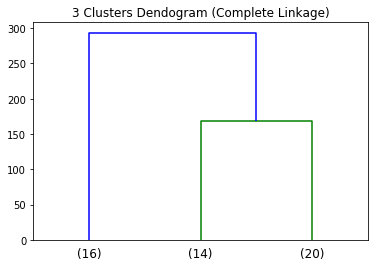

In [26]:
hr.dendrogram(h_custer, truncate_mode='lastp', p=3, labels = usdf.index)
plt.title("3 Clusters Dendogram (Complete Linkage)")
plt.show()

#### Question 8

In [27]:
usdf_scaled_df = pd.DataFrame(usdf_scaled, index=usdf.index, columns=usdf.columns)

In [28]:
usdf_scaled_df.head()

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,1.255179,0.790787,-0.526195,-0.003451
Alaska,0.513019,1.118060,-1.224067,2.509424
Arizona,0.072361,1.493817,1.009122,1.053466
Arkansas,0.234708,0.233212,-1.084492,-0.186794
California,0.281093,1.275635,1.776781,2.088814


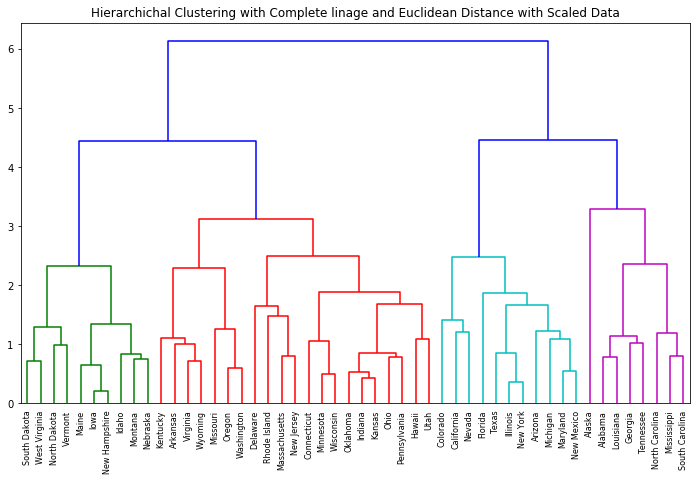

In [29]:
h_custer = hr.complete(usdf_scaled_df)
plt.figure(figsize=(12, 7))
hr.dendrogram(h_custer, labels = usdf_pc2.index)
plt.title("Hierarchichal Clustering with Complete linage and Euclidean Distance with Scaled Data")
plt.show()

Since some variables are measured on different scales, that is, have different units, to cluster data after scaling them is more reseanable. Scaling data makes the variables to be more comparable.